In [1]:
## Neural Network
## CNN 
## Recurrent Neural Network 


In [6]:
## 가변수 dummy 변수 

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 여러개의 범주형자료 => 가변수 생성( dummy 변수 )
df=pd.DataFrame({'m_id':[1,2,3,4,5],
            'm_gen':['rock','rock','pop','disco','pop']},
            columns=['m_id', 'm_gen'])

df

,m_id,m_gen
0,1,rock
1,2,rock
2,3,pop
3,4,disco
4,5,pop


In [4]:
mm=pd.get_dummies(df['m_gen']) # 가변수화 # 이산형화
mm
# disco, pop, rock 몇개 있는지 도식화


,disco,pop,rock
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


In [5]:
mm=df.join(mm.add_prefix('genre_')) # 각각의 컬럼앞에  df 조인
mm


,m_id,m_gen,genre_disco,genre_pop,genre_rock
0,1,rock,0,0,1
1,2,rock,0,0,1
2,3,pop,0,1,0
3,4,disco,1,0,0
4,5,pop,0,1,0


In [7]:
## mnist 숫자 이미지 모델화진행

In [8]:
# Summary Process
# Perceptron

# 입력신호,,,각각의 신호마다 가중치를 다르게 주어 곱하고 합한값이 임계치를 넘냐마냐에 따라 
# 활성화 유무를 결정한다 [activation func]
# ====> hidden layer 생성
# 출력 y가 연속형으로 도출
# logistic regression => 선형회귀가 아닌 '분류' 를하겠다
# 분류하고자하는 최종결과가 몇개이느냐에 따라 분류기 갯수를 정한다 
# a,b,c 대상 목표 각각의 분류기 생성,,, 후 이를 분류하는 
# sigmoid함수통해 0-1사이 결과값으로 변환 시킴 
# 퍼셉트론 : 1950년대 하드웨어 기기..당시 연산 사람이 수동으로 직접함 
# 단순 퍼셉트로,,, 선형적 계산(분류기 1개...50% 뿐....) 으로는 xor 연산이 불가능하다
# sol) multi-perceptron 등장(Multi-Layer-Perceptron)
# vanising gradient ( 경사도 손실,, 삭제  현상) 
# sigmoid의 과연속으로 인해 backpropagation 결과값이 가중치 0 이되버림
# 합성함수의 x(정의역)이 전체함수(치역)에 주는 영향도(력) 알아보기


In [11]:
# Convolutional Neural Networks
# 이미지 인식, 음성인식 분야에서 주로활용되는 분야
# deep 한 NN 모델설계가 가능했을때 가능하다 

# Hinton 교수 CIFAR 제자진 Imagenet 대회 우승자 
# 실무 > 학력

In [12]:
## NN 이용, ^y 구하기 수식 구현 
## +) MNIST db 구현 
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data # 함수 


In [13]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) # ohe해주는 속성..결과값 0,1
mnist # ( cell - 28 * 28 = 784)


W0805 10:17:49.732504 13324 deprecation.py:323] From <ipython-input-13-a29ddbfcd8f5>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0805 10:17:49.747881 13324 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0805 10:17:49.763523 13324 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
I

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0805 10:17:51.116803 13324 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0805 10:17:51.119767 13324 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0805 10:17:51.853076 13324 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000027398B33438>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002739B4F65F8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002739B4F6BE0>)

In [14]:
# train data 5만개 image ( 입력, 레이블 구성 ) => model\
# test data 1 만개 image => 모델, 출력결과 정확도 ? 
# 10 가지 분류기 종류 개수를 포함한 변숙 

In [16]:
nb_classes = 10 # 분류결과으 종류 갯수


In [21]:
x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, nb_classes])

w = tf.Variable(tf.random_normal([28*28, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hf = tf.nn.softmax(tf.matmul(x,w)+b) ## nn aj
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

# 최댓값에 해당하는 숫자 출력 도출(argmax) 
is_correct = tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
# 1차원으로 쭉 나열 


In [27]:
# 에폭 (전체 ㅔ이터를 1번 트레이니 -> 1 에폭)
training_epochs=15
batch_size= 100


Epoch:    1 cost: 2.782846367
Epoch:    2 cost: 1.092277401
Epoch:    3 cost: 0.857700571
Epoch:    4 cost: 0.748232932
Epoch:    5 cost: 0.680729940
Epoch:    6 cost: 0.634933211
Epoch:    7 cost: 0.597597148
Epoch:    8 cost: 0.570820752
Epoch:    9 cost: 0.548042165
Epoch:   10 cost: 0.527811778
Epoch:   11 cost: 0.513575451
Epoch:   12 cost: 0.496172927
Epoch:   13 cost: 0.484546270
Epoch:   14 cost: 0.473408157
Epoch:   15 cost: 0.462278179
learning finished
accuracy : 0.8902
Label: [1]
prediction: [1]


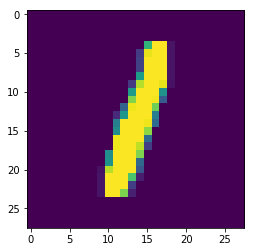

In [38]:
# 세션만들고
# training 하기 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in  range(training_epochs):#5만개 이미지 * 15번 트레이닝
        avg_cost=0
        total_batch=int(mnist.train.num_examples / batch_size) #5만/100
        for i in range(total_batch): #500번(1번에 100개씩 이미지를 읽겠다)
            batch_xs, batch_ys=mnist.train.next_batch(batch_size)
            cv, _=sess.run([cost, train], feed_dict={x:batch_xs, y:batch_ys})
            avg_cost+=cv/total_batch #  100데이터코스트/500
        print("Epoch:", '%4d' % (epoch+1),'cost:', '{:.9f}'.format(avg_cost))    
    print("learning finished")# 1, 3, 7, 10, 14   35/5=7
    print("accuracy :", sess.run(accuracy, feed_dict={x:mnist.test.images, 
                                                      y:mnist.test.labels}))
    
    r=random.randint(0, mnist.test.num_examples-1)
    print("Label:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("prediction:",sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))    
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
    plt.show()
    
            # label 도 따로 읽어준다 
            # batch_xs ( 100 * 784 )
            # batch_ys ( 100에 해당하는 y image )
            # cost. train node 객체 생성, 실행 
            # 100개의 데이터 가져와서 500 번 반복 ( 50,000 )
            # 정리
            
            # 1번 for 문 # 50000개 이미지를 15번 반복 (50000, 784)
            # # 이미지를 총 500 번 읽어들이겟다 ( 100 개씩 이미지 읽겠다 )
            # 그때의 x, y data 가 차례로 들어간다 
            # batch_xs : 100개 이미지 (100*784) // batch_ys : 숫자 이미지 (100, 10)
            # cost fun 내에서 어떻게 쓰이느냐 (cost 변수선언부)
            # y*tf.log(hf), axis=1 연산의 결과 : 10 개 ... 10개 합친 하나의 결과값 
            # cost 구할때 실제값 예측값 의 곱의 합 : 10 * 100개 이미지 
            # 이에 대한 평균 reduce_mean(reduce_sum ...) 
            # reason _ # 메모리 부담이크다 
            # 50,000 / 500 = 100개 씩 읽어온다 
            # x = [none, 784] w = [784,10] # w = 784개 있고 결과가 10개가 도출되어나옴
            # 이 cost 10 개 값에 대하여 softmax [ 0 -1 사이값 결과로 도출 ] : y^ (예측값)
            # log 취한값 hf
            # 실제값 y : [ 0 0 0 .... 1 ]해당이미지 실제값 
            # cost 읽어드린 전체 100개에 대한 reduce mean 값  
            # 100 data.. cv(cost value) / 500 누적 = > cost의 평균들어간다
    # ref) 1, 3, 7, 10, 14 35/5 7 
    #      0.2, 3, 7, 10, 14 35/5 7  #1에폭 수행완료 500번반복완료
            
            
    
    # session(close)
    
    # tf.interactive(). eval 함수사용 ====> session(close) 함수 필요 표현 (x)

In [39]:
## depth 를 더 크게 준다! 
# 진짜 딥러닝 !! 

# 여러가지 기법을 활용하여 정확도를 극대화시켜보자!! 


In [47]:
xdata = [[0,0],[0,1],[1,0],[1,1]]
ydata = [[0],[1],[1],[0]]
x = tf.placeholder(tf.float32, [None,2])
y = tf.placeholder(tf.float32, [None,1])
w = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(x,w) + b)

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype = tf.float32))

In [55]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})# x,y data 필요 
        if step % 100 == 0 :
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}), sess.run(w)) 
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})        
    print('hv:', hv, 'pre:', pv, 'acc:', av)
    print('bias', sess.run(b))
            # w가 두개 필요하다 
# result 
# step number, w1, w2
    
            
            

0 0.9048706 [[ 0.3059115]
 [-0.6636957]]
100 0.70034987 [[ 0.4571167 ]
 [-0.08230113]]
200 0.69563234 [[ 0.27730483]
 [-0.01155346]]
300 0.69405925 [[0.16707025]
 [0.01265127]]
400 0.69349957 [[0.10192736]
 [0.01941748]]
500 0.69328964 [[0.06299709]
 [0.01891637]]
600 0.6932069 [[0.03942024]
 [0.01587127]]
700 0.69317293 [[0.02495045]
 [0.01237018]]
800 0.6931585 [[0.01595545]
 [0.00923489]]
900 0.6931522 [[0.01029643]
 [0.00670621]]
1000 0.69314945 [[0.00669707]
 [0.00477914]]
1100 0.69314826 [[0.00438531]
 [0.00336073]]
1200 0.69314766 [[0.00288783]
 [0.00234046]]
1300 0.6931473 [[0.00191067]
 [0.00161827]]
1400 0.69314724 [[0.00126906]
 [0.00111285]]
1500 0.6931472 [[0.00084557]
 [0.00076213]]
1600 0.6931472 [[0.00056486]
 [0.00052029]]
1700 0.6931472 [[0.00037814]
 [0.00035434]]
1800 0.6931472 [[0.00025356]
 [0.00024084]]
1900 0.6931472 [[0.00017023]
 [0.00016344]]
2000 0.6931472 [[0.00011441]
 [0.00011079]]
2100 0.6931472 [[7.696149e-05]
 [7.502637e-05]]
2200 0.6931472 [[5.1802373

In [56]:
xdata = [[0,0],[0,1],[1,0],[1,1]]
ydata = [[0],[1],[1],[0]]

x = tf.placeholder(tf.float32, [None,2])
y = tf.placeholder(tf.float32, [None,1])

w1 = tf.Variable(tf.random_normal([2,2]))
b1 = tf.Variable(tf.random_normal([2]))

L1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([2,2]))
b2 = tf.Variable(tf.random_normal([2]))

hf = tf.sigmoid(tf.matmul(L1, w2) + b2) # 최종가설함수 

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype = tf.float32))

In [64]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})# x,y data 필요 
        if step % 100 == 0 :
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}), 
                  sess.run(w1), sess.run(w2)) 
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})        
    print('hv:', hv, 'pre:', pv, 'acc:', av)
    print('\nbias:', sess.run(b1), sess.run(b2))

0 1.1185924 [[-1.0720356   0.44674316]
 [-0.0502847   1.716932  ]] [[ 1.5520248  -0.20845415]
 [ 1.9702677   0.8978331 ]]
100 0.7166582 [[-1.2391652   0.16828017]
 [-0.24205667  1.4249262 ]] [[ 0.89138424 -0.20222582]
 [ 1.2933211   0.84998155]]
200 0.6973474 [[-1.2423301   0.02643958]
 [-0.25382292  1.3383446 ]] [[ 0.75502086 -0.18625082]
 [ 1.1585029   0.8342385 ]]
300 0.6951462 [[-1.2268194  -0.09386773]
 [-0.24204972  1.2989982 ]] [[ 0.7186717  -0.17826967]
 [ 1.1272943   0.82497084]]
400 0.69341016 [[-1.2086887  -0.21511541]
 [-0.22767851  1.2745305 ]] [[ 0.6990106  -0.17443028]
 [ 1.1194048   0.8232831 ]]
500 0.69162285 [[-1.1903985  -0.3396781 ]
 [-0.21404809  1.2617732 ]] [[ 0.68135804 -0.17308067]
 [ 1.121803    0.83020645]]
600 0.6897497 [[-1.1724542  -0.4671033 ]
 [-0.20183332  1.261651  ]] [[ 0.66288286 -0.17380331]
 [ 1.1320897   0.8459128 ]]
700 0.68774927 [[-1.1550117  -0.5969579 ]
 [-0.19121546  1.2752388 ]] [[ 0.64297163 -0.17653833]
 [ 1.1497056   0.87029105]]
800 0.6

6800 0.07147202 [[-5.193649 -6.436214]
 [ 5.509711  6.231976]] [[-5.8087    -5.922099 ]
 [ 6.5459404  6.6454296]]
6900 0.06908211 [[-5.2360644 -6.4587593]
 [ 5.552971   6.255749 ]] [[-5.87874   -5.9890094]
 [ 6.6031346  6.700592 ]]
7000 0.06683867 [[-5.276817 -6.480651]
 [ 5.594488  6.278727]] [[-5.9465485 -6.053859 ]
 [ 6.6589456  6.754438 ]]
7100 0.064729095 [[-5.3160195 -6.5019207]
 [ 5.63438    6.3009562]] [[-6.0122557 -6.1167636]
 [ 6.7134266  6.807022 ]]
7200 0.06274228 [[-5.353768  -6.5226007]
 [ 5.6727552  6.3224792]] [[-6.075979  -6.1778307]
 [ 6.766633   6.858394 ]]
7300 0.060868032 [[-5.390155  -6.5427184]
 [ 5.70971    6.343334 ]] [[-6.1378307 -6.237159 ]
 [ 6.8186183  6.908606 ]]
7400 0.05909746 [[-5.4252634 -6.5623   ]
 [ 5.745334   6.363559 ]] [[-6.1979113 -6.294837 ]
 [ 6.869427   6.957702 ]]
7500 0.05742235 [[-5.4591703 -6.581372 ]
 [ 5.779708   6.383187 ]] [[-6.2563133 -6.3509555]
 [ 6.919107   7.005727 ]]
7600 0.055835534 [[-5.4919424 -6.599954 ]
 [ 5.8129086  6.4022

In [ ]:
# nn cost 

In [65]:
x = tf.placeholder(tf.float32, [None,2])
y = tf.placeholder(tf.float32, [None,1])

w1 = tf.Variable(tf.random_normal([2,10]))
b1 = tf.Variable(tf.random_normal([10]))

L1 = tf.sigmoid(tf.matmul(x, w1) + b1) # 출력이자 입력 층

w2 = tf.Variable(tf.random_normal([10,1]))
b2 = tf.Variable(tf.random_normal([1]))
# 2,1 로 빠져나온다
hf = tf.sigmoid(tf.matmul(L1, w2) + b2) # 최종가설함수 

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype = tf.float32))

In [66]:
# 순수하게 cost만 출력
# cost를 줄이기위해 layer를 10개로 늘려랏! 

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})# x,y data 필요 
        if step % 100 == 0 :
            print(step, 'cost:',sess.run(cost, feed_dict={x:xdata, y:ydata})) 
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})        
    print('hv:', hv, 'pre:', pv, 'acc:', av)
#     print('\nbias:', sess.run(b1), sess.run(b2))

0 cost: 2.3926592
100 cost: 0.6829141
200 cost: 0.6608696
300 cost: 0.6384851
400 cost: 0.6128551
500 cost: 0.58255494
600 cost: 0.5471357
700 cost: 0.5069373
800 cost: 0.46297786
900 cost: 0.4168315
1000 cost: 0.3704297
1100 cost: 0.32574448
1200 cost: 0.2844191
1300 cost: 0.24750161
1400 cost: 0.21539298
1500 cost: 0.1879781
1600 cost: 0.16482699
1700 cost: 0.14537464
1800 cost: 0.12904033
1900 cost: 0.115291096
2000 cost: 0.10366739
2100 cost: 0.09378648
2200 cost: 0.08533544
2300 cost: 0.07806119
2400 cost: 0.07176003
2500 cost: 0.0662677
2600 cost: 0.061451778
2700 cost: 0.05720483
2800 cost: 0.05343947
2900 cost: 0.050084166
3000 cost: 0.047079965
3100 cost: 0.04437809
3200 cost: 0.04193799
3300 cost: 0.039725557
3400 cost: 0.037712336
3500 cost: 0.03587391
3600 cost: 0.034189727
3700 cost: 0.032642115
3800 cost: 0.031216018
3900 cost: 0.02989837
4000 cost: 0.028677713
4100 cost: 0.02754436
4200 cost: 0.026489604
4300 cost: 0.02550588
4400 cost: 0.024586642
4500 cost: 0.023725977

In [ ]:
# wide nn : 0.007
# wide 한 step  

In [71]:
# deep & wide
# wide - 층을 구성하는 노드의수 가 많다 
# deep - layer 수가 많다 

x = tf.placeholder(tf.float32, [None,2])
y = tf.placeholder(tf.float32, [None,1])

w1 = tf.Variable(tf.random_normal([2,10]))
b1 = tf.Variable(tf.random_normal([10]))

L1 = tf.sigmoid(tf.matmul(x, w1) + b1) # 출력이자 입력 층

w2 = tf.Variable(tf.random_normal([10,10]))
b2 = tf.Variable(tf.random_normal([10]))
L2 = tf.sigmoid(tf.matmul(L1, w2) + b2) # 최종가설함수 
# -> layer 층

w3 = tf.Variable(tf.random_normal([10,10]))
b3 = tf.Variable(tf.random_normal([10]))
# deep & wide
L3 = tf.sigmoid(tf.matmul(L2, w3) + b3) # 최종가설함수 

w4 = tf.Variable(tf.random_normal([10,10]))
b4 = tf.Variable(tf.random_normal([10]))
# deep & wide
hf = tf.sigmoid(tf.matmul(L3, w4) + b4) # 최종가설함수 

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype = tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})# x,y data 필요 
        if step % 100 == 0 :
            print(step, 'cost:',sess.run(cost, feed_dict={x:xdata, y:ydata})) 
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})        
    print('hv:', hv, 'pre:', pv, 'acc:', av)


0 cost: 1.0532382
100 cost: 0.7422164
200 cost: 0.6930148
300 cost: 0.68731594
400 cost: 0.68566024
500 cost: 0.6842843
600 cost: 0.6828438
700 cost: 0.68127805
800 cost: 0.67954904
900 cost: 0.6776179
1000 cost: 0.6754438
1100 cost: 0.6729829
1200 cost: 0.6701891
1300 cost: 0.6670152
1400 cost: 0.6634151
1500 cost: 0.6593467
1600 cost: 0.65477675
1700 cost: 0.64968526
1800 cost: 0.6440705
1900 cost: 0.6379516
2000 cost: 0.63137025
2100 cost: 0.62438726
2200 cost: 0.61707675
2300 cost: 0.60951763
2400 cost: 0.60178405
2500 cost: 0.59393734
2600 cost: 0.58602077
2700 cost: 0.5780565
2800 cost: 0.57004637
2900 cost: 0.5619729
3000 cost: 0.5538022
3100 cost: 0.545485
3200 cost: 0.53695744
3300 cost: 0.52813977
3400 cost: 0.5189355
3500 cost: 0.50922894
3600 cost: 0.49888355
3700 cost: 0.4877395
3800 cost: 0.47561437
3900 cost: 0.46230698
4000 cost: 0.44760936
4100 cost: 0.43133003
4200 cost: 0.41332847
4300 cost: 0.3935599
4400 cost: 0.37211806
4500 cost: 0.34925932
4600 cost: 0.32539055


In [69]:

# Vanishing Gradiant 
x = tf.placeholder(tf.float32, [None,2])
y = tf.placeholder(tf.float32, [None,1])

w1 = tf.Variable(tf.random_normal([2,10]))
b1 = tf.Variable(tf.random_normal([10]))

L1 = tf.sigmoid(tf.matmul(x, w1) + b1) # 출력이자 입력 층

w2 = tf.Variable(tf.random_normal([10,10]))
b2 = tf.Variable(tf.random_normal([10]))
L2 = tf.sigmoid(tf.matmul(L1, w2) + b2) # 최종가설함수 
# -> layer 층

w3 = tf.Variable(tf.random_normal([10,10]))
b3 = tf.Variable(tf.random_normal([10]))
# deep & wide
L3 = tf.sigmoid(tf.matmul(L2, w3) + b3) # 최종가설함수 

w4 = tf.Variable(tf.random_normal([10,10]))
b4 = tf.Variable(tf.random_normal([10]))
# deep & wide
L4 = tf.sigmoid(tf.matmul(L3, w4) + b4) # 최종가설함수 

w5 = tf.Variable(tf.random_normal([10,10]))
b5 = tf.Variable(tf.random_normal([10]))

L5 = tf.sigmoid(tf.matmul(L4, w5) + b5) # 출력이자 입력 층

w6 = tf.Variable(tf.random_normal([10,10]))
b6 = tf.Variable(tf.random_normal([10]))
L6 = tf.sigmoid(tf.matmul(L5, w6) + b6) # 최종가설함수 
# -> layer 층

w7 = tf.Variable(tf.random_normal([10,10]))
b7 = tf.Variable(tf.random_normal([10]))
# deep & wide
L7 = tf.sigmoid(tf.matmul(L6, w7) + b7) # 최종가설함수 

w8 = tf.Variable(tf.random_normal([10,10]))
b8 = tf.Variable(tf.random_normal([10]))
# deep & wide
L8 = tf.sigmoid(tf.matmul(L7, w8) + b8) # 최종가설함수 

w9 = tf.Variable(tf.random_normal([10,10]))
b9 = tf.Variable(tf.random_normal([10]))
# deep & wide
L9 = tf.sigmoid(tf.matmul(L8, w9) + b9) # 최종가설함수 

w10 = tf.Variable(tf.random_normal([10,1]))
b10 = tf.Variable(tf.random_normal([1]))
# deep & wide
hf = tf.sigmoid(tf.matmul(L9, w10) + b10) # 최종가설함수 

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype = tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})# x,y data 필요 
        if step % 100 == 0 :
            print(step, 'cost:',sess.run(cost, feed_dict={x:xdata, y:ydata})) 
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})        
    print('hv:', hv, 'pre:', pv, 'acc:', av)
#     print('\nbias:', sess.run(b1), sess.run(b2))

0 cost: 0.6961013
100 cost: 0.6931454
200 cost: 0.6931454
300 cost: 0.6931454
400 cost: 0.69314533
500 cost: 0.6931453
600 cost: 0.6931453
700 cost: 0.6931452
800 cost: 0.69314533
900 cost: 0.69314516
1000 cost: 0.6931453
1100 cost: 0.69314516
1200 cost: 0.69314516
1300 cost: 0.69314516
1400 cost: 0.69314516
1500 cost: 0.69314504
1600 cost: 0.6931451
1700 cost: 0.69314504
1800 cost: 0.69314504
1900 cost: 0.69314504
2000 cost: 0.6931451
2100 cost: 0.69314504
2200 cost: 0.6931449
2300 cost: 0.6931449
2400 cost: 0.6931449
2500 cost: 0.6931449
2600 cost: 0.6931449
2700 cost: 0.6931449
2800 cost: 0.69314486
2900 cost: 0.6931448
3000 cost: 0.69314474
3100 cost: 0.6931448
3200 cost: 0.69314474
3300 cost: 0.69314474
3400 cost: 0.6931447
3500 cost: 0.6931447
3600 cost: 0.6931447
3700 cost: 0.69314456
3800 cost: 0.6931447
3900 cost: 0.6931447
4000 cost: 0.69314456
4100 cost: 0.69314456
4200 cost: 0.69314456
4300 cost: 0.69314456
4400 cost: 0.6931445
4500 cost: 0.69314456
4600 cost: 0.6931445
470

In [ ]:
# 0.0014